In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
# Loading dataset in pandas and creating sample dataset
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
data = np.random.randn(len(date_range))
df = pd.DataFrame(data, index=date_range, columns=['Value'])

In [36]:
# Resampling
monthly_data = df.resample('M').mean()
# Calculating Rolling mean
rolling_mean = df.rolling(window=7).mean()

#  Seasonal Decomposition
decomposition = seasonal_decompose(df['Value'], model='additive', period=30)


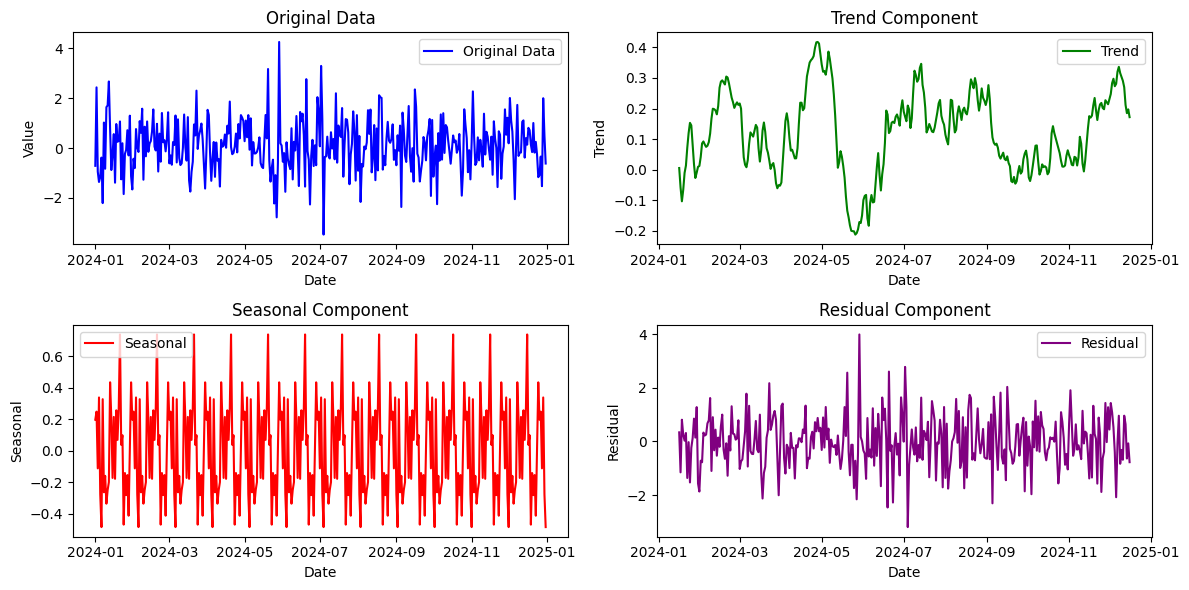

In [39]:
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Value'], label='Original Data', color='blue')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Trend Component
plt.subplot(2, 2, 2)
plt.plot(decomposition.trend.index, decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()

# Seasonal Component
plt.subplot(2, 2, 3)
plt.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal', color='red')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()

# Residual Component
plt.subplot(2, 2, 4)
plt.plot(decomposition.resid.index, decomposition.resid, label='Residual', color='purple')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()